In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

In [5]:
df = pd.read_csv('/content/Netflix Dataset (12).csv')

In [6]:
df.shape

(7789, 11)

In [8]:
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


In [10]:
df['Year'] = df['Release_Date'].dt.year

In [11]:
df['Director'] = df['Director'].fillna("Unknown")

In [12]:
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

In [13]:
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

In [15]:
 # 4. Exploratory Data Analysis (EDA)
# -------------------------------------------------------

# Count of Movies vs TV Shows
print("\nCategory Distribution:\n", df['Category'].value_counts())

# Top Countries
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))

# Dataset span (years)
print("\nDataset covers years from", df['Year'].min(), "to", df['Year'].max())



Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64

Dataset covers years from 2008.0 to 2021.0


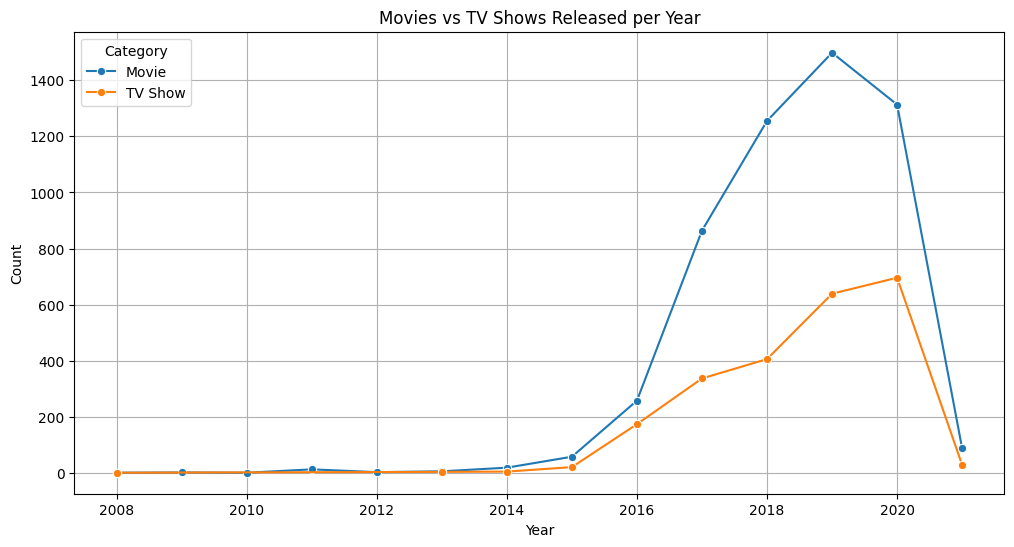

In [17]:
# -------------------------------------------------------

# 1. Line Chart – Movies vs. TV Shows released per year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6)) # Adjust figure size
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title='Category') # Add legend title
plt.grid(True) # Add grid
plt.show()

/tmp/ipython-input-2453287860.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


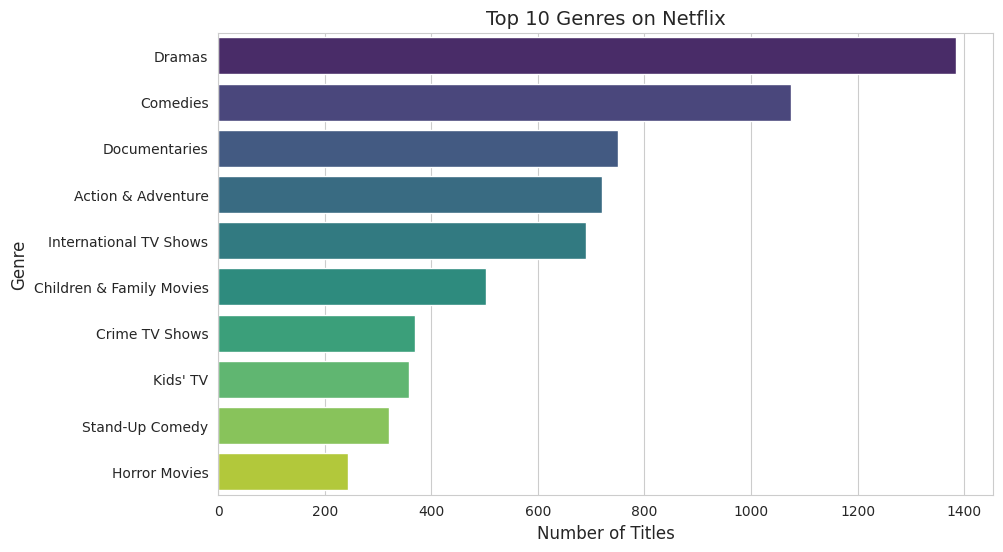

In [19]:
# 2. Bar Chart – Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
plt.figure(figsize=(10, 6)) # Adjust figure size
sns.set_style("whitegrid") # Use a seaborn style
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix", fontsize=14) # Adjust title font size
plt.xlabel("Number of Titles", fontsize=12) # Adjust label font size
plt.ylabel("Genre", fontsize=12) # Adjust label font size
plt.show()

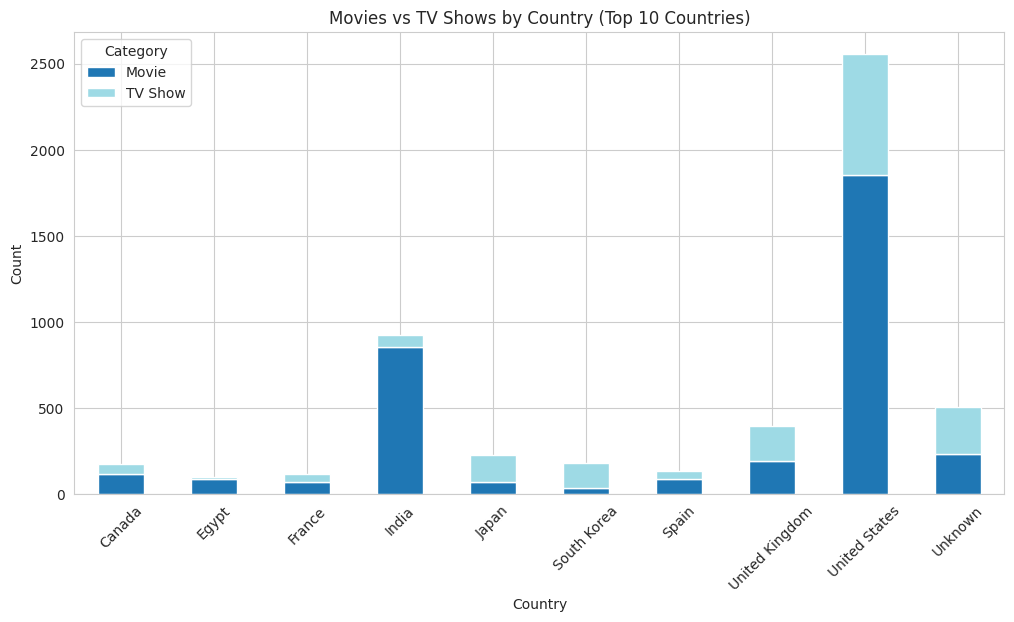

In [21]:
# 3. Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Find the most frequent directors
top_directors = df['Director'].value_counts().head(10)

# Display the top directors
print("Top 10 Most Frequent Directors on Netflix:")
print(top_directors)

# Find the most frequent actors
# Split the 'Cast' strings and create a list of all actors
all_actors = df['Cast'].str.split(', ').explode()

# Count the occurrences of each actor
top_actors = all_actors.value_counts().head(10)

# Display the top actors
print("\nTop 10 Most Frequent Actors on Netflix:")
print(top_actors)

Top 10 Most Frequent Directors on Netflix:
Director
Unknown                   2388
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Jay Chapman                 12
Martin Scorsese             12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64

Top 10 Most Frequent Actors on Netflix:
Cast
Unknown             718
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     30
Om Puri              30
Akshay Kumar         29
Takahiro Sakurai     29
Boman Irani          27
Paresh Rawal         27
Amitabh Bachchan     27
Name: count, dtype: int64


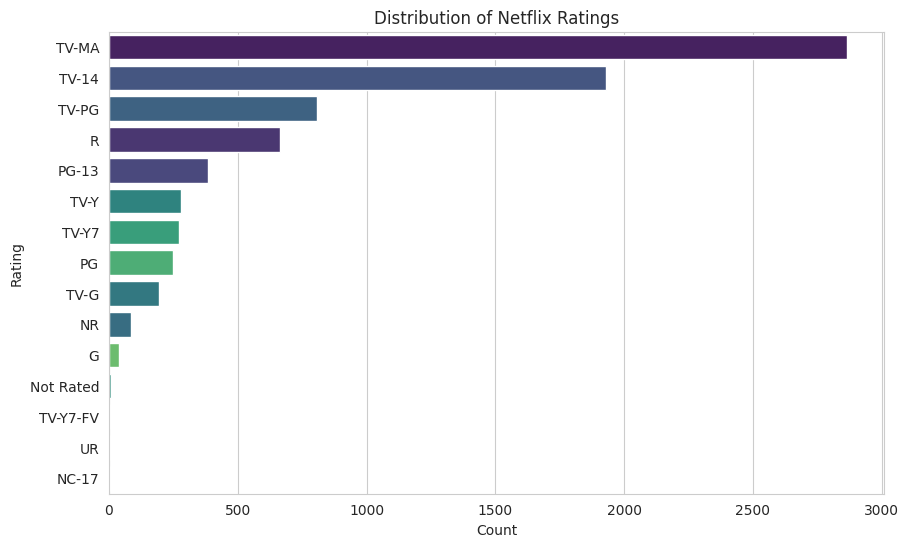

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='viridis', hue='Rating', legend=False)
plt.title('Distribution of Netflix Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

In [26]:
# 4. Choropleth Map – Country-wise Content
import plotly.express as px # Import plotly.express
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(country_counts, locations="Country", locationmode="country names",
                    color="Count", hover_name="Country",
                    color_continuous_scale="viridis", title="Netflix Content by Country")
fig.show()

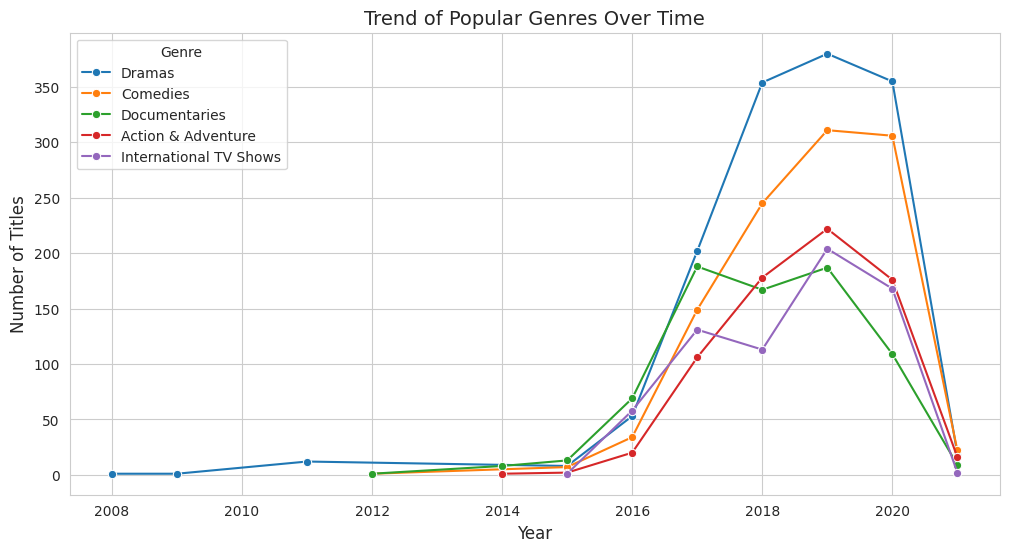

In [28]:
# 5. Trend Line – Growth of Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6)) # Adjust figure size
sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o") # Add markers
plt.title("Trend of Popular Genres Over Time", fontsize=14) # Adjust title font size
plt.xlabel("Year", fontsize=12) # Adjust label font size
plt.ylabel("Number of Titles", fontsize=12) # Adjust label font size
plt.legend(title="Genre") # Add legend title
plt.show()

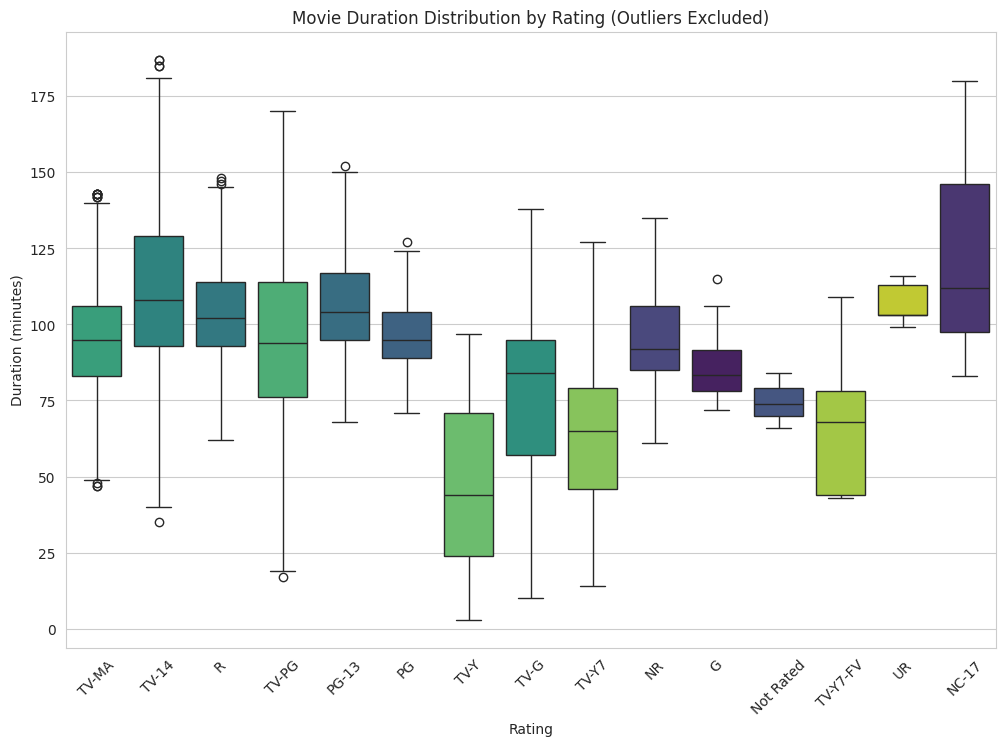

In [32]:
# Filter for movies
movies_df = df[df['Category'] == 'Movie'].copy()

# Extract duration in minutes for movies
movies_df['Duration_minutes'] = movies_df['Duration'].str.replace(' min', '').astype(float)

# Drop rows with missing duration after conversion
movies_df.dropna(subset=['Duration_minutes'], inplace=True)

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for each rating group
filtered_movies_df = movies_df.groupby('Rating').apply(lambda x: remove_outliers_iqr(x, 'Duration_minutes'), include_groups=False).reset_index()


# Visualize the distribution of movie durations by rating after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_movies_df, x='Rating', y='Duration_minutes', order=movies_df['Rating'].value_counts().index, palette='viridis', hue='Rating', legend=False)
plt.title('Movie Duration Distribution by Rating (Outliers Excluded)')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

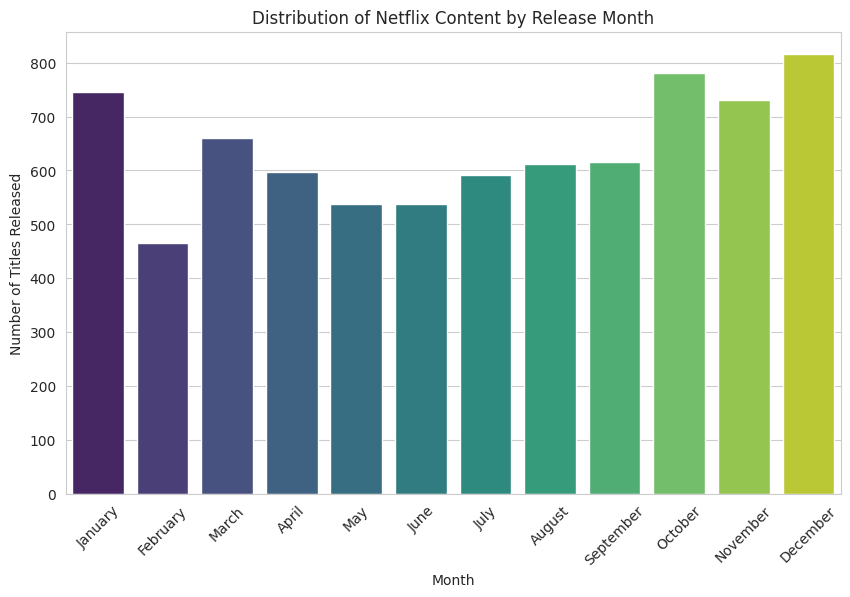

In [35]:
# Extract month from 'Release_Date'
df['Release_Month'] = df['Release_Date'].dt.month

# Count the number of releases per month
monthly_counts = df['Release_Month'].value_counts().sort_index()

# Map month numbers to month names for better readability
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_counts.index = monthly_counts.index.map(month_names)

# Visualize the distribution of content by release month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis', hue=monthly_counts.index, legend=False)
plt.title('Distribution of Netflix Content by Release Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Released')
plt.xticks(rotation=45)
plt.show()